In [1]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [2]:
read = emcee.backends.HDFBackend("jam_axi_rms.h5")

In [3]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

chain = read.get_chain()   

In [4]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
print(np.where(log_prob == log_prob.max()))
print(log_prob.max())

(array([27578, 27579, 27580, 27581, 27582, 27583, 27584, 27585]), array([67, 67, 67, 67, 67, 67, 67, 67]))
-11.52864845642314


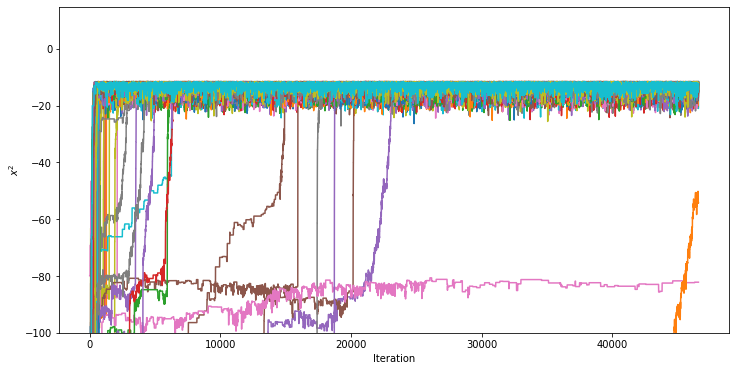

In [23]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-100)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

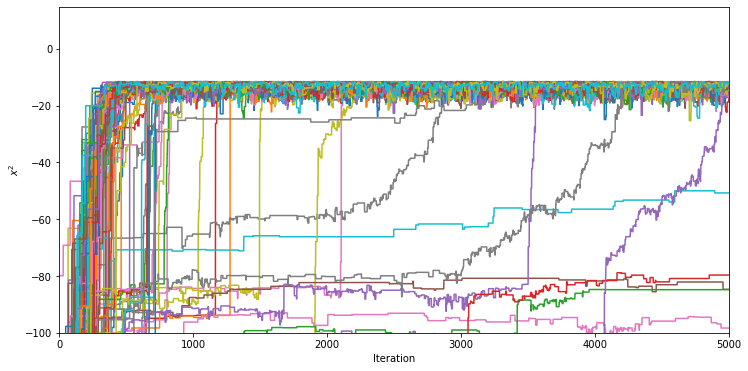

In [26]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-100)
    plt.xlim(0,5000)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

In [5]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 120


array([9088., 9209., 9067., 9049., 9088., 9107., 8868., 9018., 9177.,
       9133., 8907., 9150., 9200., 9157., 9059., 9166., 9240., 9287.,
       9159., 8958., 9214., 9152., 9126.,  334., 5583., 8915., 8863.,
       8821., 9330., 9112., 9212., 8958., 9054., 9156., 9051., 6663.,
       9178., 8972., 9016., 9082., 9216., 9177., 9129., 9267., 8945.,
       8941., 9080., 9184., 8967., 8137., 9051., 9326., 9163., 9090.,
       9117., 6262., 9219., 6099., 9000., 9267., 9069., 9132., 9123.,
       9147., 9087., 6853., 1396., 8852., 9004., 9161., 9178., 9090.,
       9048., 9207., 9028., 9059., 8948., 9146., 9226.,   89., 9204.,
       9103., 8481., 9069., 9164., 9146., 9231., 9083., 9097., 9213.,
       8979., 8979., 8996., 8466., 5921., 9076., 9011., 9072., 8837.,
       8927., 9283., 1165., 9033., 9100., 8685., 9239., 9242., 8749.,
       9002., 8872., 8988., 8984., 9205., 9218., 9195., 9121.,  771.,
       8675., 9248., 9243.])

[1056.91153164 1065.59486816  800.17922147  120.58880507]
flat chain shape: (1391760, 4)
flat log prob shape: (1391760,)


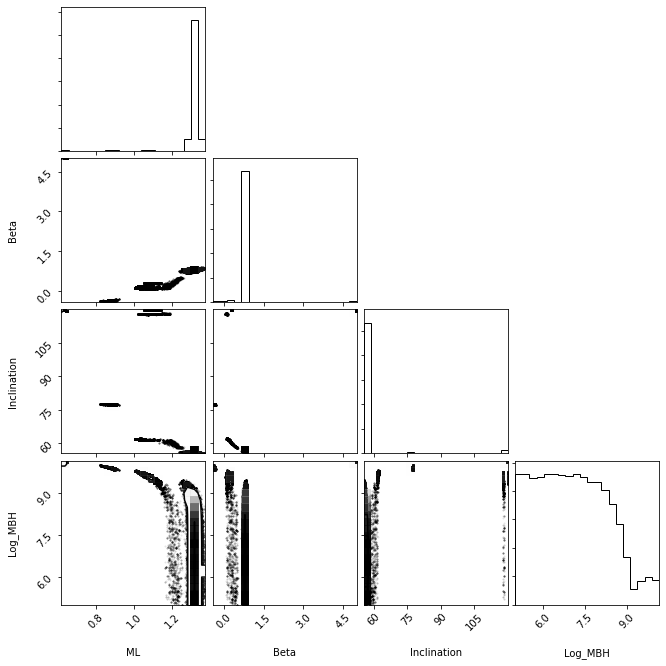

In [7]:
#Corner plots

labels = ["ML", "Beta", "Inclination", "Log_MBH"]

tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(discard=35000,flat=True)
log_prob_samples = read.get_log_prob(discard=35000,flat=True)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels);

In [7]:
tau = read.get_autocorr_time()

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 932;
tau: [1056.91153164 1065.59486816  800.17922147  120.58880507]

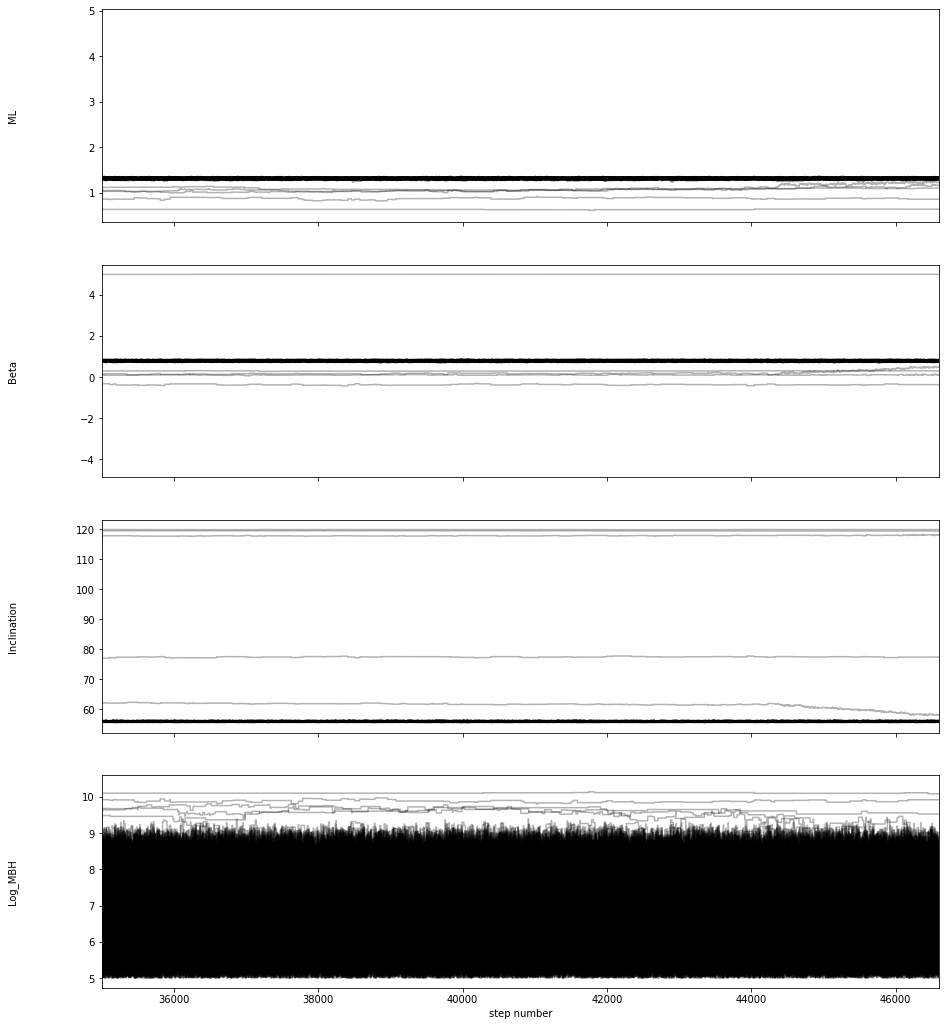

In [10]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(35000, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


axes[-1].set_xlabel("step number");

In [9]:
it, accep_tot, time, accep_100 = np.loadtxt("Output_LogFile.txt", unpack=True)

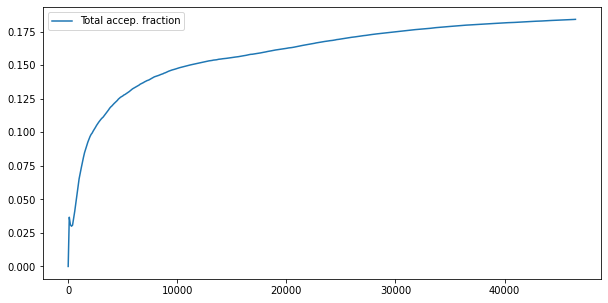

In [10]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.legend()

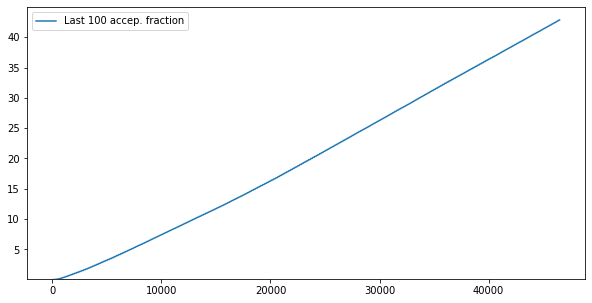

In [11]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
plt.ylim(0.15,)
plt.legend()